In [82]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2016, 1, 1)
end = dt.datetime.now()
#default
ticker = 'TSLA'
df = web.DataReader("TSLA", 'yahoo', start, end)
df.reset_index(inplace=True)
df.set_index('Date', inplace=True)

print(df.head())




                  High         Low        Open       Close   Volume  \
Date                                                                  
2016-01-04  231.380005  219.000000  230.720001  223.410004  6827100   
2016-01-05  226.889999  220.000000  226.360001  223.429993  3186800   
2016-01-06  220.050003  215.979996  220.000000  219.039993  3779100   
2016-01-07  218.440002  213.669998  214.190002  215.649994  3554300   
2016-01-08  220.440002  210.770004  217.860001  211.000000  3628100   

             Adj Close  
Date                    
2016-01-04  223.410004  
2016-01-05  223.429993  
2016-01-06  219.039993  
2016-01-07  215.649994  
2016-01-08  211.000000  


In [67]:
#retrieve historical stock price data of given stock ticker
def get_stock_prices():
    
    #get stock ticker from input
    ticker = input("Enter the Stock ticker (for example AAPL): ")
    print(ticker)
    
    df = web.DataReader(ticker, 'yahoo', start, end)
    #df.reset_index(inplace=True)
    #df.set_index('Date', axis=1)
    print(df)

In [73]:
#visualize the data
ticker = 'GOOG'
df = web.DataReader(ticker, 'yahoo', start, end)
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971
...,...,...,...,...,...,...
2020-08-24,1614.170044,1580.569946,1593.979980,1588.199951,1409900,1588.199951
2020-08-25,1611.619995,1582.069946,1582.069946,1608.219971,2247100,1608.219971
2020-08-26,1659.219971,1603.599976,1608.000000,1652.380005,3993400,1652.380005


In [74]:
#create a simple moving 50-day average
SMA_short = pd.DataFrame()
SMA_short['Adj Close'] = df['Adj Close'].rolling(window=30).mean()
SMA_short

#create a simple moving 200-day average
SMA_long = pd.DataFrame()
SMA_long['Adj Close'] = df['Adj Close'].rolling(window=100).mean()
SMA_long


,Adj Close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2020-08-24,1415.065845
2020-08-25,1419.939645
2020-08-26,1425.484645


In [75]:
df['SMA short'] = SMA_short['Adj Close']
df['SMA long'] = SMA_long['Adj Close']
df

,High,Low,Open,Close,Volume,Adj Close,SMA short,SMA long
Date,,,,,,,,
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027,NaN,NaN
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017,NaN,NaN
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995,NaN,NaN
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015,NaN,NaN
2016-01-08,733.229980,713.000000,731.450012,714.469971,2450900,714.469971,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-08-24,1614.170044,1580.569946,1593.979980,1588.199951,1409900,1588.199951,1521.541321,1415.065845
2020-08-25,1611.619995,1582.069946,1582.069946,1608.219971,2247100,1608.219971,1524.462655,1419.939645
2020-08-26,1659.219971,1603.599976,1608.000000,1652.380005,3993400,1652.380005,1529.087321,1425.484645


In [76]:
def signals(data):
    buy = []
    sell = []
    #flag indicates wether the short term MA is currently abover the long term MA
    flag = -1
    
    for i in range(len(data)):
        short = df['SMA short'][i]
        long= df['SMA long'][i]
        current = df['Adj Close'][i]
        
        if short > long:
            if flag != 1:
                buy.append(current)
                sell.append(np.nan)
                flag = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        elif short < long:
            if flag != 0:
                buy.append(np.nan)
                sell.append(current)
                flag = 0
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    
    return (buy, sell)


buy_sell = signals(df)
df['Buy_Signal_Price'] = buy_sell[0]
df['Sell_Signal_Price'] = buy_sell[1]
print(df)

                   High          Low         Open        Close   Volume  \
Date                                                                      
2016-01-04   744.059998   731.257996   743.000000   741.840027  3272800   
2016-01-05   752.000000   738.640015   746.450012   742.580017  1950700   
2016-01-06   747.179993   728.919983   730.000000   743.619995  1947000   
2016-01-07   738.500000   719.059998   730.309998   726.390015  2963700   
2016-01-08   733.229980   713.000000   731.450012   714.469971  2450900   
...                 ...          ...          ...          ...      ...   
2020-08-24  1614.170044  1580.569946  1593.979980  1588.199951  1409900   
2020-08-25  1611.619995  1582.069946  1582.069946  1608.219971  2247100   
2020-08-26  1659.219971  1603.599976  1608.000000  1652.380005  3993400   
2020-08-27  1655.000000  1625.750000  1653.680054  1634.329956  1861600   
2020-08-28  1647.170044  1630.750000  1633.489990  1644.410034  1499000   

              Adj Close 

GOOG


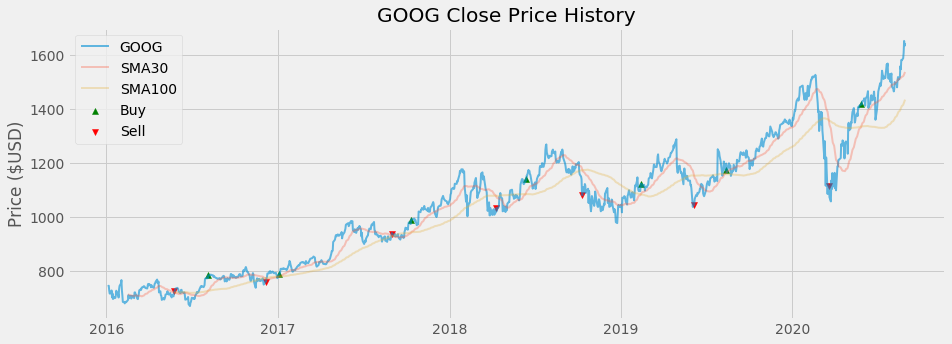

In [77]:
#Visualize the data

print(ticker)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
plt.plot(df["Close"], label=ticker, linewidth=2.0, alpha=0.6)
plt.plot(df['SMA short'], label='SMA30', linewidth=2.0, alpha=0.3)
plt.plot(df['SMA long'], label='SMA100', linewidth=2.0, alpha=0.3)
plt.scatter(df.index, df['Buy_Signal_Price'], label='Buy', marker='^', color='green')
plt.scatter(df.index, df['Sell_Signal_Price'], label='Sell', marker='v', color='red')
plt.title(f'{ticker} Close Price History')
plt.ylabel('Price ($USD)')
plt.legend(loc='upper left')
plt.show()

In [51]:
def calculate_return():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-51-0c9201b7d51c>, line 2)